In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
np.random.seed(42)

In [3]:
import pandas as pd
df = pd.read_csv("scatter-points.csv")
points = df.to_numpy()

In [4]:
blue_points = points[points[:,0] < 0.4]
blue_points = blue_points[blue_points[:,1] > 0.6]
blue_points

array([[ 1.43922558e-02,  6.20535117e-01],
       [ 4.90688096e-02,  7.32256330e-01],
       [-4.45382762e-04,  7.83587757e-01],
       [ 7.76752547e-02,  9.16243939e-01],
       [ 5.80344384e-02,  1.05952167e+00],
       [ 1.63829004e-01,  6.07564921e-01],
       [ 1.09105153e-01,  7.33172229e-01],
       [ 1.36793376e-01,  7.93097221e-01],
       [ 1.79665223e-01,  9.44787091e-01],
       [ 1.12911634e-01,  1.00272322e+00],
       [ 2.26428058e-01,  7.06803101e-01],
       [ 2.32980825e-01,  8.45286617e-01],
       [ 2.43314650e-01,  9.34099742e-01],
       [ 2.94359486e-01,  1.00382860e+00],
       [ 3.52370219e-01,  7.37352359e-01],
       [ 3.44153908e-01,  7.76336596e-01],
       [ 3.56722150e-01,  9.55610465e-01],
       [ 3.92371480e-01,  1.04864216e+00]])

(-0.05, 1.15)

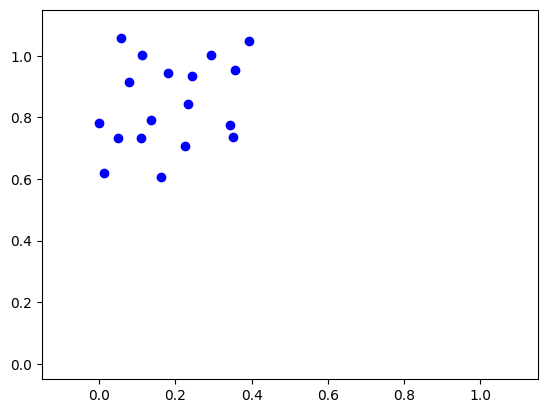

In [5]:
plt.scatter(blue_points[:,0], blue_points[:,1], color='blue')
plt.xlim(-0.15, 1.15)
plt.ylim(-0.05, 1.15)

In [6]:
mask = ~np.isin(points, blue_points).all(axis=1)
red_points = points[mask]

(-0.05, 1.15)

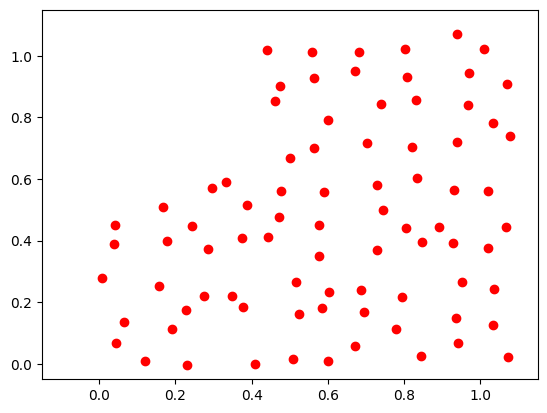

In [7]:
plt.scatter(red_points[:,0], red_points[:,1], color='red')
plt.xlim(-0.15, 1.15)
plt.ylim(-0.05, 1.15)

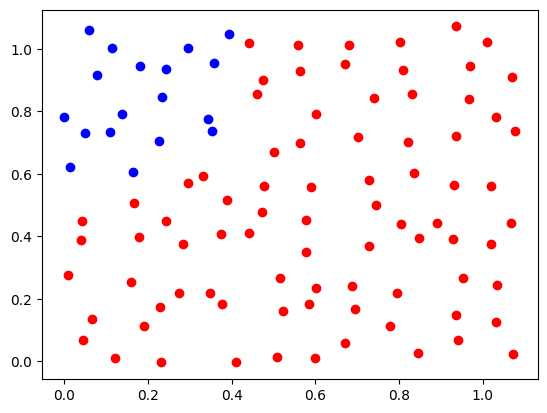

In [8]:
plt.scatter(blue_points[:,0], blue_points[:,1], color='blue')
plt.scatter(red_points[:,0], red_points[:,1], color='red')

In [9]:
y = []
for point in points:
    if point in red_points:
        y.append([0, 1])
    if point in blue_points:
        y.append([1, 0])

print(y)

[[0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [1, 0], [1, 0], [1, 0], [1, 0], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [1, 0], [1, 0], [1, 0], [1, 0], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1]]


In [34]:
class NeuralNetwork:
    def __init__(self, num_input_neurons, num_hidden_layers, num_output_neurons):
        self.num_input_neurons = num_input_neurons
        self.num_hidden_layers = num_hidden_layers
        self.num_output_neurons = num_output_neurons
        
        self.num_all_layer_neurons = []
        
        self.all_layer_values = []
        self.preact = []
        self.aftact = []
        
        self.weights = []
        self.bias = []
        
        self.weights_gradients = []
        self.bias_gradients = []
        

    def set_hidden_neurons(self):
        self.num_all_layer_neurons.append(self.num_input_neurons)
        for i in range(self.num_hidden_layers):
            self.num_all_layer_neurons.append(int(input(f"Hidden Layer {i+1}: ")))
        self.num_all_layer_neurons.append(self.num_output_neurons)
       
    def initialize_weights(self):
        if len(self.weights) == len(self.num_all_layer_neurons)-1:
            return None
        else:
            for i in range(len(self.num_all_layer_neurons)-1):
                self.weights.append(np.random.rand(self.num_all_layer_neurons[i], self.num_all_layer_neurons[i+1]))

    def initialize_bias(self):
        if len(self.bias) == len(self.num_all_layer_neurons)-1:
            return None
        else:
            for i in range(len(self.weights)):
                self.bias.append(np.random.rand(self.num_all_layer_neurons[i+1]))

    def tanh_activation(self, x):
        return (np.e**(2*x) - 1)/(np.e**(2*x) + 1)

    def d_tanh(self, x):
        return 1 - (self.tanh_activation(x)**2)

    def sigmoid_activation(self, x):
        return 1/ (1 + np.e**(-x))

    def d_sigmoid(self, x):
        return self.sigmoid_activation(x) * (1 - self.sigmoid_activation(x))
    
    def forward(self, input_vector):
        if len(self.all_layer_values) == len(self.num_all_layer_neurons) + 1:
            return self.all_layer_values[-1]
            
        output = input_vector
        self.all_layer_values.append(output)
        #print(f"Input: {output}")
        
        for i in range(len(self.weights)):
            if i == len(self.weights)-1:
                output = np.dot(output, self.weights[i]) + self.bias[i]
                self.all_layer_values.append(output)
                #print(f"Output Layer: {output}")
                
                output = self.sigmoid_activation(output)
                self.all_layer_values.append(output)
                #print(f"Output Layer after activation: {output}")
                
            else:  
                output = np.dot(output, self.weights[i]) + self.bias[i]
                self.all_layer_values.append(output)
                self.preact.append(output)
                #print(f"Layer {i+1}: {output}")
                
                output = self.tanh_activation(output)
                self.all_layer_values.append(output)
                self.aftact.append(output)
                #print(f"Layer {i+1} after activation: {output}")
                
        return self.all_layer_values[-1]

    def calculate_loss(self, y_true, y_pred):
        y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)
        loss = - (y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
        return np.mean(loss)

    def clear_network(self):
        self.initialize_weights()
        self.initialize_bias()    

    def backward(self, y_true, y_pr):
        y_true = np.array(y_true).reshape(1, -1)
        y_pr = np.array(y_pred).reshape(1, -1)

        self.weights_gradients = []
        self.bias_gradients = []
        delta = 0

        delta = (y_pred - y_true) * self.d_sigmoid(self.all_layer_values[-2]).reshape(1, -1)
        
        for i in range(len(self.weights)):
            
            if i == len(self.weights)-1:
                input_layer = self.all_layer_values[0].reshape(1, -1)
                self.weights_gradients.append(np.dot(input_layer.T, delta))
                self.bias_gradients.append(delta)
                return None

            A_prev = self.aftact[-(i+1)].reshape(1, -1)
            Z_prev = self.preact[-(i+1)].reshape(1, -1)
            self.weights_gradients.append(np.dot(A_prev.T, delta))
            self.bias_gradients.append(delta)
            delta = np.dot(delta, self.weights[-(i+1)].T) * self.d_tanh(Z_prev)

    def update_weights(self, learning_rate):
        for i in range(len(self.weights_gradients)):
            self.weights[-(i+1)] = self.weights[-(i+1)] - (learning_rate*self.weights_gradients[i])
            self.bias[-(i+1)] = self.bias[-(i+1)] - (learning_rate*self.bias_gradients[i])   


In [35]:
nn = NeuralNetwork(2, 1, 2)
nn.set_hidden_neurons()

Hidden Layer 1:  3


In [36]:
nn.num_all_layer_neurons

[2, 3, 2]

In [37]:
nn.initialize_weights()
nn.initialize_bias()

In [38]:
weights = []
weights = nn.weights
for i in weights:
    print(i)
    print()

[[0.96563203 0.80839735 0.30461377]
 [0.09767211 0.68423303 0.44015249]]

[[0.12203823 0.49517691]
 [0.03438852 0.9093204 ]
 [0.25877998 0.66252228]]



In [39]:
bias = nn.bias
for i in bias:
    print(i)

[0.31171108 0.52006802 0.54671028]
[0.18485446 0.96958463]


In [40]:
print(points[0])

[0.04531427 0.06796733]


In [41]:
y_pred = nn.forward(points[0])
print(y_pred)
nn.calculate_loss(y[0], y_pred)

ValueError: shapes (2,) and (3,2) not aligned: 2 (dim 0) != 3 (dim 0)

In [18]:
nn.all_layer_values

[array([0.04531427, 0.06796733]),
 array([0.89010387, 0.2660242 , 0.22559727]),
 array([0.71144503, 0.25992148, 0.22184641]),
 array([0.38553711, 1.31969325]),
 array([0.59520789, 0.78913067])]

In [19]:
nn.preact

[array([0.89010387, 0.2660242 , 0.22559727])]

In [20]:
nn.aftact

[array([0.71144503, 0.25992148, 0.22184641])]

In [21]:
for i in range(10):
    print(points[i], y[i])

[0.04531427 0.06796733] [0, 1]
[0.06473172 0.13577409] [0, 1]
[0.00769037 0.27796893] [0, 1]
[0.03913065 0.38939614] [0, 1]
[0.0430464 0.4502481] [0, 1]
[0.01439226 0.62053512] [1, 0]
[0.04906881 0.73225633] [1, 0]
[-4.45382762e-04  7.83587757e-01] [1, 0]
[0.07767525 0.91624394] [1, 0]
[0.05803444 1.05952167] [1, 0]


In [22]:
epochs = 1000
l = []
for epoch in range(epochs):
    for (point, label) in zip(points, y):
        y_pred = nn.forward(point)
        loss = nn.calculate_loss(label, y_pred)
        nn.backward(label, y_pred)
        nn.update_weights(0.01)
    print(f"Epoch {epoch+1}/{epochs}, Loss: {loss}")
    l.append(loss)

Epoch 1/1000, Loss: 0.19310762375786142
Epoch 2/1000, Loss: 0.15407136777814015
Epoch 3/1000, Loss: 0.1231316335156514
Epoch 4/1000, Loss: 0.09979191284754042
Epoch 5/1000, Loss: 0.08251626302764588
Epoch 6/1000, Loss: 0.06972188023556705
Epoch 7/1000, Loss: 0.06014139841148751
Epoch 8/1000, Loss: 0.05285465823017399
Epoch 9/1000, Loss: 0.047217910978258365
Epoch 10/1000, Loss: 0.0427846475492086
Epoch 11/1000, Loss: 0.039243506551184776
Epoch 12/1000, Loss: 0.03637472959917115
Epoch 13/1000, Loss: 0.03402085634740892
Epoch 14/1000, Loss: 0.03206723516832639
Epoch 15/1000, Loss: 0.030429035014494944
Epoch 16/1000, Loss: 0.029042511800218516
Epoch 17/1000, Loss: 0.027859062605899175
Epoch 18/1000, Loss: 0.02684112127056793
Epoch 19/1000, Loss: 0.02595928413103099
Epoch 20/1000, Loss: 0.025190268269091518
Epoch 21/1000, Loss: 0.02451544083607407
Epoch 22/1000, Loss: 0.023919745464358443
Epoch 23/1000, Loss: 0.023390908469728102
Epoch 24/1000, Loss: 0.02291884473564701
Epoch 25/1000, Loss

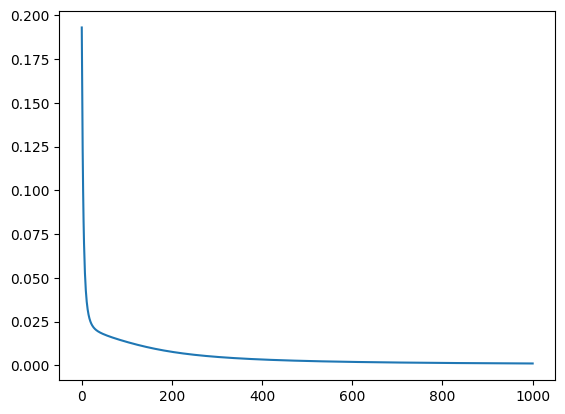

In [23]:
x = np.linspace(0, epochs, epochs)
y_l = np.array(l)
plt.plot(x, y_l)

In [24]:
#bluepoints (x < 0.5 & y > 0.5)
#redpoints (x < 0.5 & y < 0.5) and (x > 0.5 & y > 0.5)

In [25]:
y_p = nn.forward(blue_points[1])
y_p

array([[0.45328931, 0.54248206]])